In [11]:
# Import libraries
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [12]:
# Sigmoid function
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [13]:
# Data generating
N = 50
D = 50

# Uniformly distributed numbers between -5, +5
# Generates numbers uniformly distributed in the interval [0, 1).
X = (np.random.random((N, D)) - 0.5)*10

In [14]:
# True weights - only the first 3 dimensions of X affect Y
true_w = np.array([1, 0.5, -0.5] + [0]*(D - 3))

# Generate Y - add noise with variance 0.5
T = np.round(sigmoid(X.dot(true_w) + np.random.randn(N)*0.5))

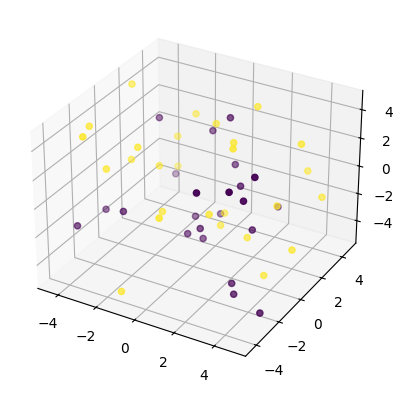

In [15]:
# Plot the data to see what it looks like
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=Y)
plt.show()

In [30]:
# Gradient Descent to find w

costs = [] # Keep track of the **Cross-Entropy cost (Log Loss) with L1 regularization

w = np.random.randn(D) / np.sqrt(D) # Randomly initialize w (Method Xavier/He)
learning_rate = 0.001
l1 = 3.0 # Regularization coefficient

for i in range(500):
  # Update w
  Y = sigmoid(X.dot(w))
  w = w - learning_rate * (X.T.dot(Y - T) + l1 * np.sign(w))

  # Find and store the cost
  cost = -(T * np.log(Y) + (1-T) * np.log(1 - Y)).mean() + l1 * np.abs(w).mean()
  costs.append(cost)

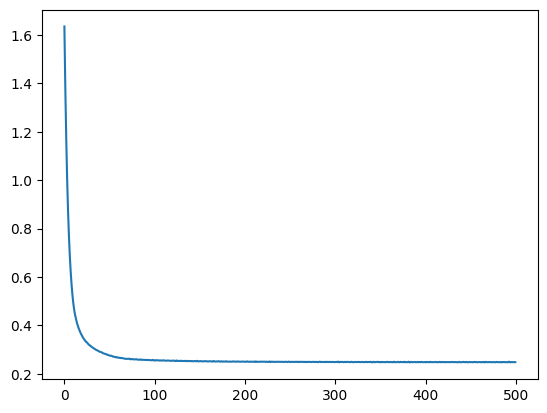

In [31]:
# plot the costs
plt.plot(costs)
plt.show()

In [32]:
print("final w:", w)

final w: [ 7.74933972e-01  3.04263806e-01 -3.21571624e-01  1.20781938e-04
  6.59956347e-04 -2.12739332e-03 -3.01026173e-03 -1.41456819e-01
  2.61453008e-02  9.14613706e-04  2.45572628e-03  1.78334571e-05
  3.06888490e-01 -5.79122151e-04  9.65563445e-04 -2.33991081e-03
  6.49252954e-04  1.17456586e-03  2.19042869e-03  4.83609731e-02
 -3.73698019e-03 -2.29864492e-03 -3.90429184e-04 -4.25768560e-03
  7.50894925e-04 -1.76612765e-03 -1.49882332e-03 -4.09807346e-02
 -6.26677023e-04 -1.73003793e-01 -1.16913449e-01  2.50144538e-04
  1.09667184e-01  3.61287729e-03 -4.51066417e-04 -1.16404452e-03
 -5.40142660e-03 -3.25991062e-03 -7.87112753e-04 -2.17536654e-03
  3.66554780e-03  1.78019987e-03  9.67488993e-02  1.28922357e-03
  1.66145817e-03  1.61743179e-03  1.81573332e-03 -3.95532817e-03
  1.39897448e-03  9.78862576e-02]


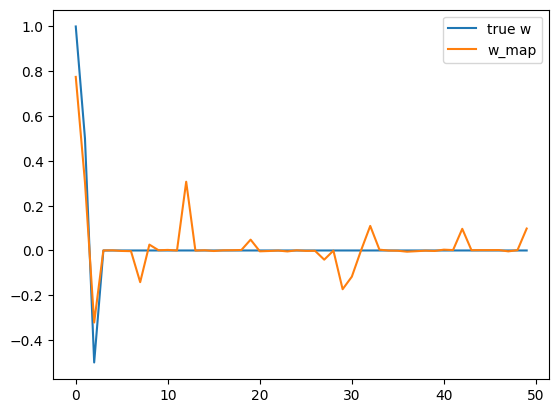

In [33]:
# plot our w vs true w
plt.plot(true_w, label='true w')
plt.plot(w, label='w_map')
plt.legend()
plt.show()